## Reading and Displaying CSV data

In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time_Spent_on_Site  10000 non-null  float64
 1   Total_Amount_Spent  10000 non-null  float64
 2   Page_Views          10000 non-null  float64
 3   AOV                 10000 non-null  float64
 4   Group               10000 non-null  object 
dtypes: float64(4), object(1)
memory usage: 390.8+ KB


      Time_Spent_on_Site  Total_Amount_Spent  Page_Views        AOV Group
0              90.987906              496.88        12.0  47.348084     A
1              50.794390              347.66        14.0  38.614252     A
2              66.206264              161.50        13.0  21.520578     A
3              61.225810               70.91         8.0  11.533441     A
4             122.862188             1014.99        14.0  90.846582     A
...                  ...                 ...         ...        ...   ...
9995          110.375357               99.26        30.0  22.399053     B
9996          172.102860               52.29        40.0  29.303279     B
9997          134.548224              332.94        27.0  52.063372     B
9998           68.672467              233.74        24.0  28.713010     B
9999          160.964552               13.23        27.0  12.977338     B

[10000 rows x 5 columns]

## Filtering Data

In [1]:
# Create filtered DataFrames
data_a = data[data['Group'] == 'A']
data_b = data[data['Group'] == 'B']

# Display both DataFrames
display(data_a)
display(data_b)

      Time_Spent_on_Site  Total_Amount_Spent  Page_Views        AOV Group
0              90.987906              496.88        12.0  47.348084     A
1              50.794390              347.66        14.0  38.614252     A
2              66.206264              161.50        13.0  21.520578     A
3              61.225810               70.91         8.0  11.533441     A
4             122.862188             1014.99        14.0  90.846582     A
...                  ...                 ...         ...        ...   ...
4995          101.266367              100.60        23.0  17.340411     A
4996           53.983563              183.99        14.0  20.652185     A
4997           74.526835              463.80        21.0  32.932672     A
4998           69.242324               23.59        15.0   8.553449     A
4999          173.051784              126.80        24.0  27.007073     A

[5000 rows x 5 columns]

      Time_Spent_on_Site  Total_Amount_Spent  Page_Views         AOV Group
5000           68.119998               80.77        17.0   15.306463     B
5001           46.363129              757.89        14.0   98.879776     B
5002           76.004365               34.47        14.0    8.435420     B
5003           70.897366               77.14        14.0   14.927193     B
5004           62.448103              937.23        15.0  118.719481     B
...                  ...                 ...         ...         ...   ...
9995          110.375357               99.26        30.0   22.399053     B
9996          172.102860               52.29        40.0   29.303279     B
9997          134.548224              332.94        27.0   52.063372     B
9998           68.672467              233.74        24.0   28.713010     B
9999          160.964552               13.23        27.0   12.977338     B

[5000 rows x 5 columns]


## Descriptive Statistics

In [1]:
# Displaying descriptive statistics
display(data_a.describe())
display(data_b.describe())

       Time_Spent_on_Site  Total_Amount_Spent   Page_Views          AOV
count         5000.000000         5000.000000  5000.000000  5000.000000
mean            91.067536          208.178696    16.603400    27.764577
std             52.863039          321.006354     6.214936    46.197085
min             11.987637            0.000000     3.000000     0.000000
25%             55.434768           39.905000    12.000000     9.883202
50%             80.846721           95.675000    15.000000    16.036843
75%            116.526556          217.017500    20.000000    28.558765
max            788.816287         3809.110000    49.000000  1171.633427

       Time_Spent_on_Site  Total_Amount_Spent   Page_Views          AOV
count         5000.000000         5000.000000  5000.000000  5000.000000
mean            89.727811          203.876290    17.803200    26.666511
std             53.266944          298.960525     6.484572    35.945528
min             12.385792            0.000000     4.000000     0.000000
25%             54.461079           45.440000    13.000000    10.340919
50%             79.044170          112.465000    16.000000    17.538870
75%            115.288794          230.137500    21.000000    29.752410
max            925.234557         3773.200000    49.000000   891.007723


## Introduction to Histograms

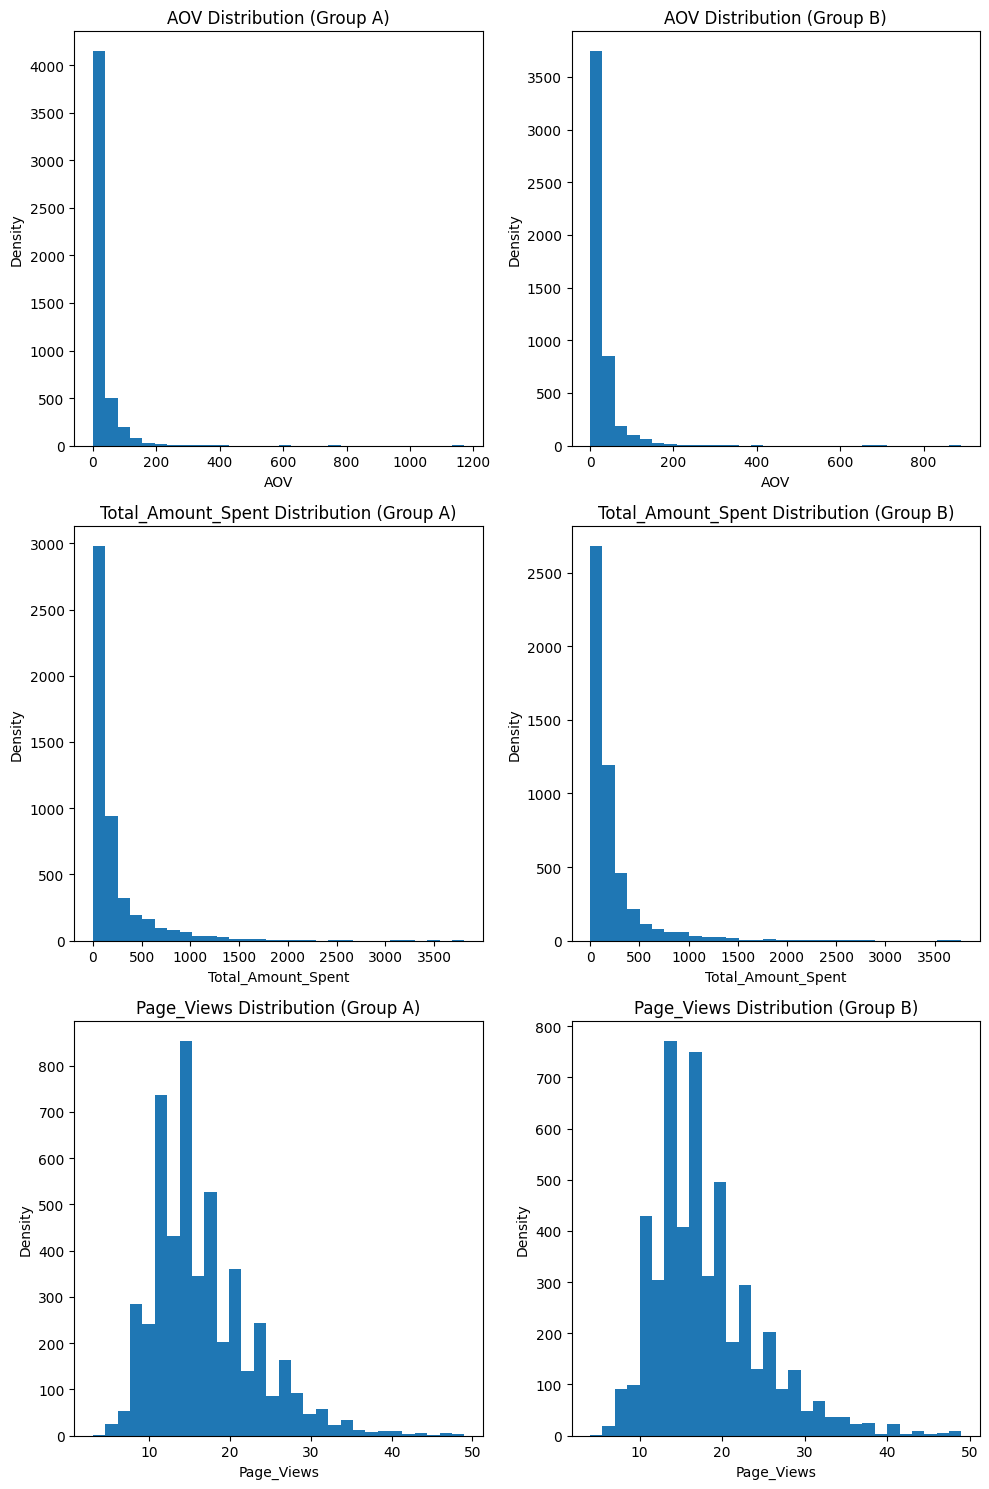

In [1]:
# # Importing the matplotlib.pyplot library as plt
# import matplotlib.pyplot as plt

# # Selecting a column to visualize
# column_aov = data_a["AOV"]

# # Creating a single plot (1x1) of a specific size
# fig, axes = plt.subplots(1, 1, figsize=(16, 5))

# # Initializing the plot title
# axes.set_title(f"{column_aov.name} Distribution")

# # Generating the histogram of a column with 30 bins
# axes.hist(column_aov, bins=30)

# # Labeling the x-axis and y-axis
# axes.set_xlabel(column_aov.name)
# axes.set_ylabel("Density")

# # Rendering and displaying the plot
# plt.show()

# Plotting multiple distributions in one figure
import matplotlib.pyplot as plt

columns = ["AOV", "Total_Amount_Spent", "Page_Views"]
groups = [("Group A", data_a), ("Group B", data_b)]

# Create a figure with len(columns) rows and 2 columns
fig, axes = plt.subplots(len(columns), 2, figsize=(10, 5 * len(columns)))

for i, col in enumerate(columns):
    for j, (label, df) in enumerate(groups):
        ax = axes[i, j]
        ax.hist(df[col], bins=30)
        ax.set_title(f"{col} Distribution ({label})")
        ax.set_xlabel(col)
        ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

## Theoretical Distribution

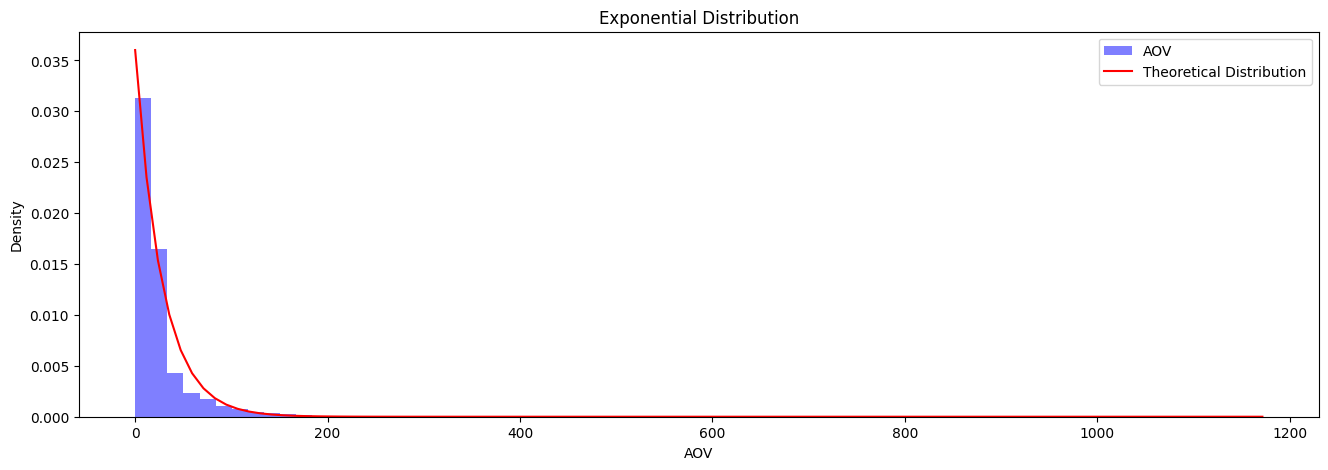

In [1]:
# Importing mathematical and statistical libraries
import numpy as np
from scipy import stats

# Selecting the column
column = data_a["AOV"]

# Calculating the theoretical distributions based on the data
x_values = np.linspace(min(column), max(column), 100)  # Creating a range of values for the x-axis
distributions = {  # Dictionary with calculated theoretical distributions
    "Normal": stats.norm.pdf(x_values, *stats.norm.fit(column)),
    "Exponential": stats.expon.pdf(x_values, *stats.expon.fit(column)),
    "Uniform": stats.uniform.pdf(x_values, loc=min(column), scale=max(column)-min(column))
}

# Specifying the distribution to use
distribution_name = "Exponential"
distribution = distributions[distribution_name]

# Plotting
fig, axes = plt.subplots(1, 1, figsize=(16, 5))  # Creating a single plot
axes.hist(column, bins=70, alpha=0.5, label=column.name, density=True, color="blue")  # Histogram of the data
axes.plot(x_values, distribution, label="Theoretical Distribution", color="red")  # Theoretical distribution line
axes.set_title(f"{distribution_name} Distribution")
axes.set_xlabel(column.name)
axes.set_ylabel("Density")
axes.legend()  # Displaying legend
plt.show()

## Outlier Detection

In [1]:
# Creating a function to detect outliers
def detect_outliers(column):
    # Normalizing the data
    transformed_data, _ = stats.boxcox(column + 1)

    # Calculating IQR
    Q1 = np.percentile(transformed_data, 25)
    Q3 = np.percentile(transformed_data, 75)
    IQR = Q3 - Q1

    # Calculating boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detecting outliers
    outlier_indices = column.index[
        (transformed_data < lower_bound) | (transformed_data > upper_bound)
    ]

    return outlier_indices

# Extracting outlier indices
data_a_spent_outliers = detect_outliers(data_a["Total_Amount_Spent"])
data_a_aov_outliers = detect_outliers(data_a["AOV"])
data_b_spent_outliers = detect_outliers(data_b["Total_Amount_Spent"])
data_b_aov_outliers = detect_outliers(data_b["AOV"])

# Printing outlier quantity
print(f"Number of group A spent outliers: {data_a_spent_outliers.size}")
print(f"Number of group A AOV outliers: {data_a_aov_outliers.size}")
print(f"Number of group B spent outliers: {data_b_spent_outliers.size}")
print(f"Number of group B AOV outliers: {data_b_aov_outliers.size}")

# Printing total outlier count across all four series
total_outliers = (
    data_a_spent_outliers.size +
    data_b_spent_outliers.size +
    data_a_aov_outliers.size +
    data_b_aov_outliers.size
)
print(f"Total count of identified outliers across all columns and groups: {total_outliers}")

Number of group A spent outliers: 65
Number of group A AOV outliers: 433
Number of group B spent outliers: 70
Number of group B AOV outliers: 381
Total count of identified outliers across all columns and groups: 949


## Outlier Removal

In [1]:
# Filtering group A data
data_a_filtered = data_a.drop(data_a_spent_outliers)
data_a_filtered = data_a_filtered.drop(data_a_aov_outliers, errors="ignore")

# Displaying filtered data
display(data_a_filtered)

# Filtering group B data
data_b_filtered = data_b.drop(data_b_spent_outliers)
data_b_filtered = data_b_filtered.drop(data_b_aov_outliers, errors="ignore")

# Displaying filtered data
display(data_b_filtered)

# Calculate removed outliers by row count difference
removed_a = len(data_a) - len(data_a_filtered)
removed_b = len(data_b) - len(data_b_filtered)
total_removed = removed_a + removed_b

print(f"Outliers removed in group A: {removed_a}")
print(f"Outliers removed in group B: {removed_b}")
print(f"Total outliers removed: {total_removed}")

      Time_Spent_on_Site  Total_Amount_Spent  Page_Views        AOV Group
0              90.987906              496.88        12.0  47.348084     A
1              50.794390              347.66        14.0  38.614252     A
2              66.206264              161.50        13.0  21.520578     A
3              61.225810               70.91         8.0  11.533441     A
4             122.862188             1014.99        14.0  90.846582     A
...                  ...                 ...         ...        ...   ...
4995          101.266367              100.60        23.0  17.340411     A
4996           53.983563              183.99        14.0  20.652185     A
4997           74.526835              463.80        21.0  32.932672     A
4998           69.242324               23.59        15.0   8.553449     A
4999          173.051784              126.80        24.0  27.007073     A

[4558 rows x 5 columns]

      Time_Spent_on_Site  Total_Amount_Spent  Page_Views        AOV Group
5000           68.119998               80.77        17.0  15.306463     B
5001           46.363129              757.89        14.0  98.879776     B
5002           76.004365               34.47        14.0   8.435420     B
5003           70.897366               77.14        14.0  14.927193     B
5005           57.996547               34.09        14.0   6.325083     B
...                  ...                 ...         ...        ...   ...
9995          110.375357               99.26        30.0  22.399053     B
9996          172.102860               52.29        40.0  29.303279     B
9997          134.548224              332.94        27.0  52.063372     B
9998           68.672467              233.74        24.0  28.713010     B
9999          160.964552               13.23        27.0  12.977338     B

[4610 rows x 5 columns]

Outliers removed in group A: 442
Outliers removed in group B: 390
Total outliers removed: 832


## Hypothesis Testing

In [1]:
# Creating a function that performs an A/B test
def ab_test(sample_a, sample_b, column_name):
    # Performing the Mann–Whitney U test
    _, p = stats.mannwhitneyu(
        sample_a[column_name],
        sample_b[column_name],
        alternative="less"
    )
    
    # Interpreting results
    if p < 0.05:
        print(f"{column_name}: Group B wins (reject H0)")
    else:
        print(f"{column_name}: Group A wins (fail to reject H0)")
        
    # Printing the p-value
    print(f"p-value = {p}")

# Running the test for the AOV column
ab_test(data_a, data_b, "AOV")

# Run A/B tests on unfiltered data
ab_test(data_a, data_b, "Total_Amount_Spent")
ab_test(data_a, data_b, "AOV")

# Run A/B tests on filtered data
ab_test(data_a_filtered, data_b_filtered, "Total_Amount_Spent")
ab_test(data_a_filtered, data_b_filtered, "AOV")

AOV: Group B wins (reject H0)
p-value = 0.00058531175755755
Total_Amount_Spent: Group B wins (reject H0)
p-value = 0.00018182453359100208
AOV: Group B wins (reject H0)
p-value = 0.00058531175755755
Total_Amount_Spent: Group B wins (reject H0)
p-value = 7.432759229333209e-05
AOV: Group B wins (reject H0)
p-value = 0.00022581959090150434


## Conducting A/B Test